In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k

In [2]:
!pip install pyarrow

  Using cached pyarrow-16.0.0-cp39-cp39-manylinux_2_28_x86_64.whl (40.8 MB)


In [3]:
def plot_timeseries(df: pd.DataFrame, indx=0 ) -> None:
    '''Plot the generated time series data.
        Args:
            df: Pandas DataFrame with the generated data
            indx: index of the time series to plot
        '''
    df[f'y{indx}' ].plot(style='o')
  

    plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized hyper parameters:  6.35**2 * RBF(length_scale=22.1)


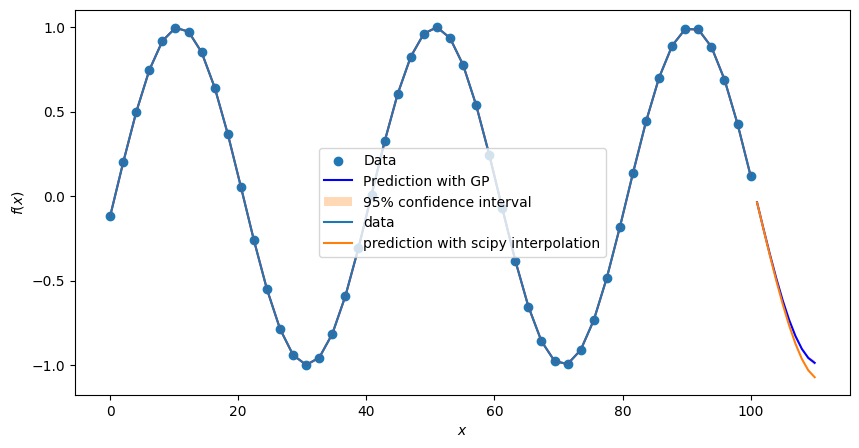

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k


x= np.array([
    0.000000, 2.040816, 4.081633, 6.122449, 8.163265, 10.204082, 12.244898, 14.285714, 16.326531, 18.367347,
    20.408163, 22.448980, 24.489796, 26.530612, 28.571429, 30.612245, 32.653061, 34.693878, 36.734694, 38.775510,
    40.816327, 42.857143, 44.897959, 46.938776, 48.979592, 51.020408, 53.061224, 55.102041, 57.142857, 59.183673,
    61.224490, 63.265306, 65.306122, 67.346939, 69.387755, 71.428571, 73.469388, 75.510204, 77.551020, 79.591837,
    81.632653, 83.673469, 85.714286, 87.755102, 89.795918, 91.836735, 93.877551, 95.918367, 97.959184, 100.000000]).reshape(-1, 1)
    

y = np.array([ -0.119718, 0.199222, 0.497865, 0.745781, 0.917710, 0.996135, 0.973065, 0.850852, 0.641946, 0.367633,
    0.055863, -0.261599, -0.552407, -0.786931, -0.941276, -0.999716, -0.956296, -0.815441, -0.591501, -0.307294,
    0.008222, 0.322901, 0.604679, 0.824848, 0.960975, 0.999189, 0.935597, 0.776679, 0.538626, 0.245693,
    -0.072273, -0.382875, -0.654467, -0.859376, -0.976725, -0.994556, -0.911054, -0.734725, -0.483537, -0.183082,
    0.136027, 0.441277, 0.701565, 0.890372, 0.988461, 0.985836, 0.882766, 0.689753, 0.426461, 0.119718
])


kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction with GP')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval(GP)"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

x= np.array([
    0.000000, 2.040816, 4.081633, 6.122449, 8.163265, 10.204082, 12.244898, 14.285714, 16.326531, 18.367347,
    20.408163, 22.448980, 24.489796, 26.530612, 28.571429, 30.612245, 32.653061, 34.693878, 36.734694, 38.775510,
    40.816327, 42.857143, 44.897959, 46.938776, 48.979592, 51.020408, 53.061224, 55.102041, 57.142857, 59.183673,
    61.224490, 63.265306, 65.306122, 67.346939, 69.387755, 71.428571, 73.469388, 75.510204, 77.551020, 79.591837,
    81.632653, 83.673469, 85.714286, 87.755102, 89.795918, 91.836735, 93.877551, 95.918367, 97.959184, 100.000000])
    
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10])
spl = interp1d(x, y, kind='cubic', fill_value= 'extrapolate')
y_new = spl(x_new)
plt.plot(x,y, label='data')
plt.plot(x_new,y_new, label='prediction with scipy interpolation')
plt.legend()
plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized hyper parameters:  4.72**2 * RBF(length_scale=40.6)


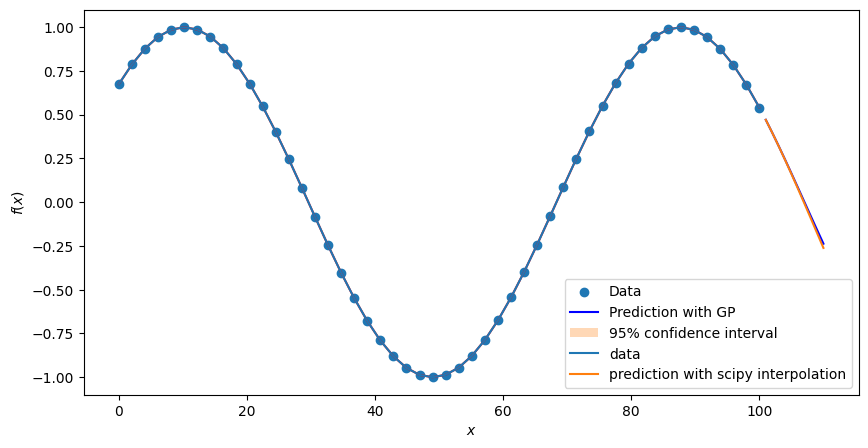

In [31]:
x= np.array([
    0.000000, 2.040816, 4.081633, 6.122449, 8.163265, 10.204082, 12.244898, 14.285714,
    16.326531, 18.367347, 20.408163, 22.448980, 24.489796, 26.530612, 28.571429, 30.612245,
    32.653061, 34.693878, 36.734694, 38.775510, 40.816327, 42.857143, 44.897959, 46.938776,
    48.979592, 51.020408, 53.061224, 55.102041, 57.142857, 59.183673, 61.224490, 63.265306,
    65.306122, 67.346939, 69.387755, 71.428571, 73.469388, 75.510204, 77.551020, 79.591837,
    81.632653, 83.673469, 85.714286, 87.755102, 89.795918, 91.836735, 93.877551, 95.918367,
    97.959184, 100.000000
]).reshape(-1, 1)
y = np.array([
    0.675208, 0.787535, 0.878326, 0.945100, 0.986031, 0.999998, 0.986621, 0.946265,
    0.880034, 0.789739, 0.677848, 0.547422, 0.402026, 0.245637, 0.082532, -0.082831,
    -0.245928, -0.402301, -0.547672, -0.678068, -0.789922, -0.880177, -0.946362, -0.986670,
    -0.999998, -0.985981, -0.945002, -0.878183, -0.787350, -0.674987, -0.544167, -0.398467,
    -0.241871, -0.078661, 0.086701, 0.249691, 0.405853, 0.550918, 0.680918, 0.792298,
    0.882013, 0.947610, 0.987295, 0.999982, 0.985325, 0.943725, 0.876319, 0.784950, 0.672117,
    0.540904
])

kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction with GP')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval(GP)"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
x= np.array([
    0.000000, 2.040816, 4.081633, 6.122449, 8.163265, 10.204082, 12.244898, 14.285714,
    16.326531, 18.367347, 20.408163, 22.448980, 24.489796, 26.530612, 28.571429, 30.612245,
    32.653061, 34.693878, 36.734694, 38.775510, 40.816327, 42.857143, 44.897959, 46.938776,
    48.979592, 51.020408, 53.061224, 55.102041, 57.142857, 59.183673, 61.224490, 63.265306,
    65.306122, 67.346939, 69.387755, 71.428571, 73.469388, 75.510204, 77.551020, 79.591837,
    81.632653, 83.673469, 85.714286, 87.755102, 89.795918, 91.836735, 93.877551, 95.918367,
    97.959184, 100.000000
])
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10])
spl = interp1d(x, y, kind='cubic', fill_value= 'extrapolate')
y_new = spl(x_new)
plt.plot(x,y, label='data')
plt.plot(x_new,y_new, label='prediction with scipy interpolation')
plt.legend()
plt.show()


/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized hyper parameters:  3.25**2 * RBF(length_scale=44.3)


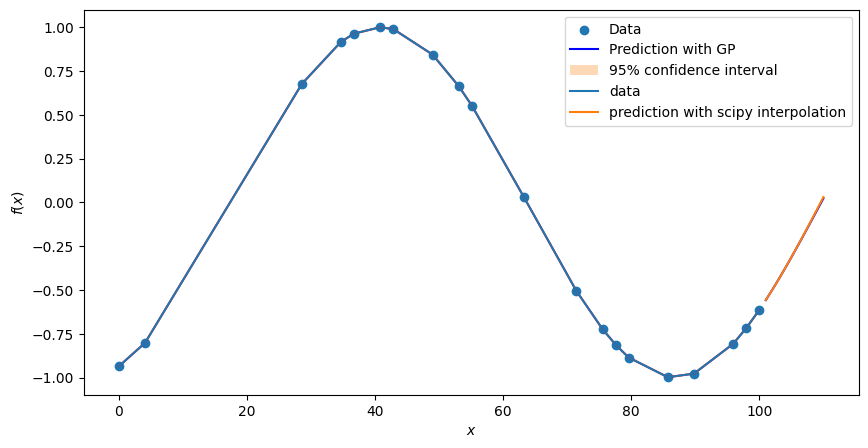

In [32]:
x=np.array([0.000000,4.081633,28.571429,34.693878,36.734694,40.816327, 42.857143, 48.979592,53.061224, 55.102041, 63.265306, 71.428571, 75.510204, 77.551020, 79.591837,85.714286, 89.795918, 95.918367,97.959184,100.000000]).reshape(-1, 1)  
y=np.array([-0.935345, -0.801834, 0.676413, 0.917279, 0.963726, 0.999962, 0.989047, 0.843810,0.663487,0.553060, 0.028283,-0.505068,-0.723138, -0.812117,-0.885332, -0.997870,-0.977275,-0.806904,-0.716976,-0.613131])


kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction with GP')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval(GP)"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
x=np.array([0.000000,4.081633,28.571429,34.693878,36.734694,40.816327, 42.857143, 48.979592,53.061224, 55.102041, 63.265306, 71.428571, 75.510204, 77.551020, 79.591837,85.714286, 89.795918, 95.918367,97.959184,100.000000])  
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10])
spl = interp1d(x, y, kind='cubic', fill_value= 'extrapolate')
y_new = spl(x_new)
plt.plot(x,y, label='data')
plt.plot(x_new,y_new, label='prediction with scipy interpolation')
plt.legend()
plt.show()


Optimized hyper parameters:  35**2 * RBF(length_scale=8.63)


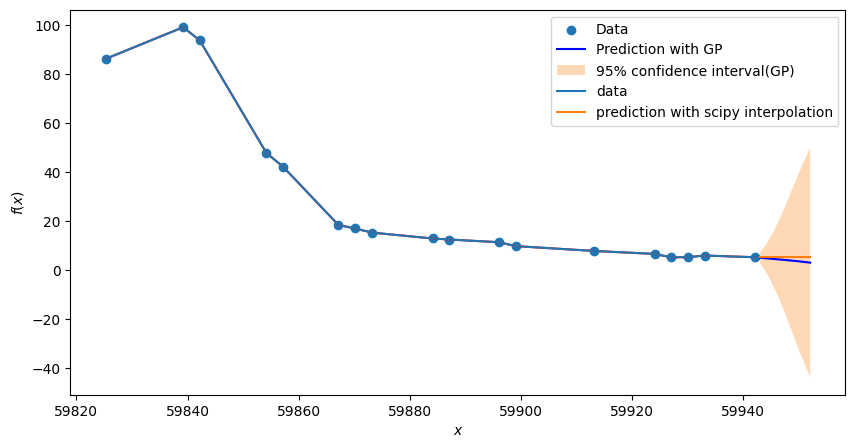

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k

x=np.array([59825.2600,59839.2161,59842.1987,59854.2089,59857.1879,59867.1600,59870.1521,59873.1442,59884.1292,59887.0951,59896.0839,59899.0854,59913.2446,59924.0589,59927.0604,59930.0619,59933.0632,59942.0746]).reshape(-1, 1)
y=np.array([86.338806,
    99.276337,
    93.904762,
   47.852257,
    42.310360,
   18.470497,
   17.048243,
   15.373705,
  12.950831,
 12.540225,
  11.421582,
  9.837990,
  7.855823,
 6.651262,
  5.266479,
  5.318574,
 5.987988,
 5.297144])



kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction with GP')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval(GP)"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
x=np.array([59825.2600,59839.2161,59842.1987,59854.2089,59857.1879,59867.1600,59870.1521,59873.1442,59884.1292,59887.0951,59896.0839,59899.0854,59913.2446,59924.0589,59927.0604,59930.0619,59933.0632,59942.0746])
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3, x[len(x)-1]+4, x[len(x)-1]+5, x[len(x)-1]+6, x[len(x)-1]+7, x[len(x)-1]+8, x[len(x)-1]+9, x[len(x)-1]+10])
spl = interp1d(x, y, kind='nearest', fill_value= 'extrapolate')
y_new = spl(x_new)
plt.plot(x,y, label='data')
plt.plot(x_new,y_new, label='prediction with scipy interpolation')
plt.legend()
plt.show()
